1. Dataset: Breast Cancer Wisconsin (Diagnostic)
- Target: variável alvo é a diagnosis (M = maligno, B = benigno)
- Descrição: O dataset contém informações de características dos núcleos celulares presentes em imagens digitalizadas de massas mamárias. O objetivo é prever se a massa é maligna ou benigna.
- Exercício: Crie um modelo de classificação para prever a variável alvo utilizando MultinomialNB e avalie o desempenho usando validação cruzada com 10 folds. Depois, repita o processo utilizando LogisticRegression.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [18]:
classes = dict()
for target in np.unique(y):
    classes[target] = np.size(y[y == target])

{0: 212, 1: 357}

In [3]:
# Separando em conjunto de treino e validação
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separando em conjunto de teste e validação
X_test, X_val, y_test, y_val = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [4]:
# Criando os modelos
nb = MultinomialNB()
lr = LogisticRegression(max_iter=10000, random_state=1032)

In [5]:
# Aplicando validação cruzada 10-fold para o modelo Multinomial Naive Bayes
scores_nb = cross_val_score(nb, X_train, y_train, cv=10)

# Aplicando validação cruzada 10-fold para o modelo Logistic Regression
scores_lr = cross_val_score(lr, X_train, y_train, cv=10)

# Imprimindo os resultados
print("Validação Cruzada 10-fold para Multinomial Naive Bayes: ")
print("Acurácia média: {:.2f}".format(scores_nb.mean()))
print("Desvio padrão: {:.2f}".format(scores_nb.std()))
print("\n")
print("Validação Cruzada 10-fold para Logistic Regression: ")
print("Acurácia média: {:.2f}".format(scores_lr.mean()))
print("Desvio padrão: {:.2f}".format(scores_lr.std()))

Validação Cruzada 10-fold para Multinomial Naive Bayes: 
Acurácia média: 0.88
Desvio padrão: 0.05


Validação Cruzada 10-fold para Logistic Regression: 
Acurácia média: 0.95
Desvio padrão: 0.04


In [6]:
# Treinando e ajustando os modelos com o conjunto de treino
nb.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Fazendo as previsões nos conjuntos de teste e validação
y_pred_test_nb = nb.predict(X_test)
y_pred_test_lr = lr.predict(X_test)
y_pred_val_nb = nb.predict(X_val)
y_pred_val_lr = lr.predict(X_val)

# Imprimindo as métricas de classificação para os modelos no conjunto de teste
print("Métricas de classificação para Multinomial Naive Bayes no conjunto de teste: ")
print(classification_report(y_test, y_pred_test_nb))
print("\n")
print("Métricas de classificação para Logistic Regression no conjunto de teste: ")
print(classification_report(y_test, y_pred_test_lr))

Métricas de classificação para Multinomial Naive Bayes no conjunto de teste: 
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        27
           1       0.83      1.00      0.91        30

    accuracy                           0.89        57
   macro avg       0.92      0.89      0.89        57
weighted avg       0.91      0.89      0.89        57



Métricas de classificação para Logistic Regression no conjunto de teste: 
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.88      1.00      0.94        30

    accuracy                           0.93        57
   macro avg       0.94      0.93      0.93        57
weighted avg       0.94      0.93      0.93        57



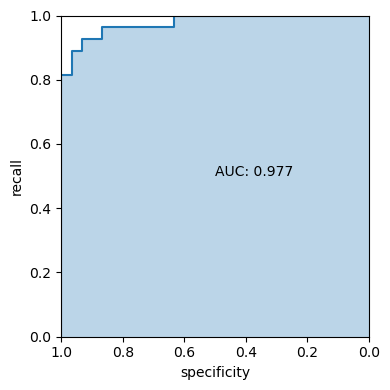

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:, 0], pos_label=0)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.text(0.5, 0.5, f'AUC: {np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)):.3f}')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

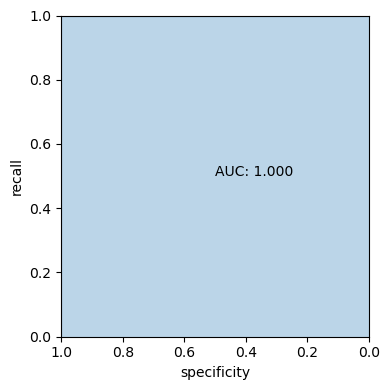

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 0], pos_label=0)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.text(0.5, 0.5, f'AUC: {np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)):.3f}')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()